# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

from keras import models
from keras import layers
from keras import regularizers

In [2]:
df = pd.read_csv('compresive_strength_concrete.csv') #loading data

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

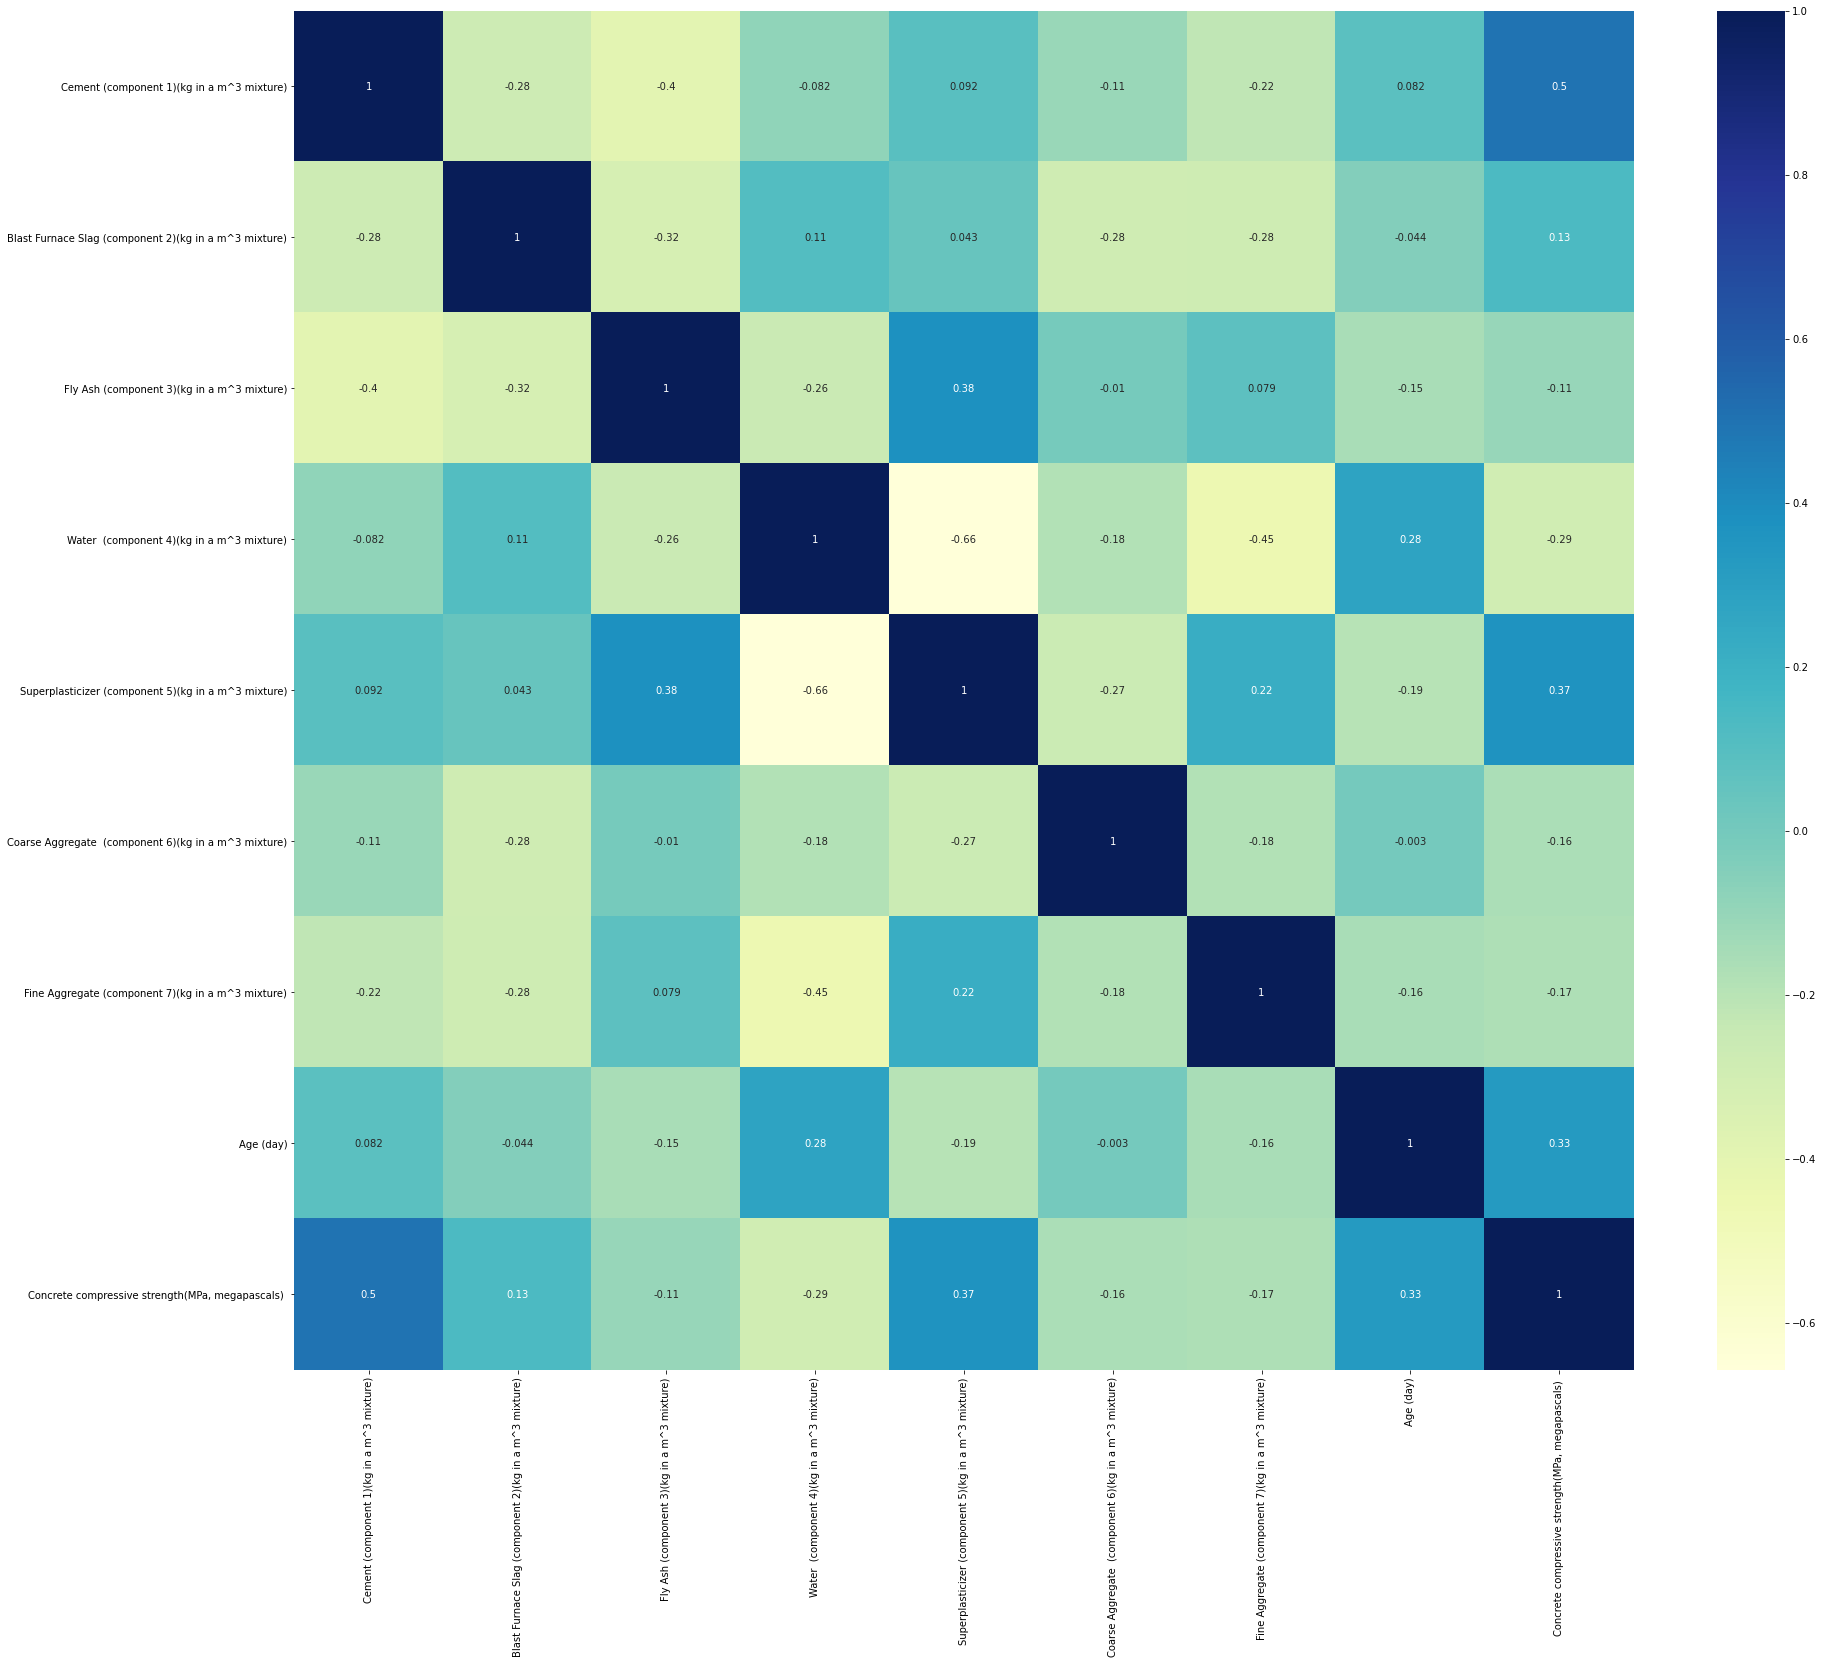

In [6]:
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [7]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

# Data cleaning

In [8]:
#Renaming our columns to make it shorter, as all other factors are same

df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
                   'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'Blast Furnace Slag',
                   'Fly Ash (component 3)(kg in a m^3 mixture)' : 'Fly Ash', 
                   'Water  (component 4)(kg in a m^3 mixture)' : 'Water',
                   'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'Superplasticizer',
                   'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'Coarse Aggregate',
                   'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'Fine Aggregate', 
                   'Concrete compressive strength(MPa, megapascals) ' : 'Concrete compressive strength(MPa)'}, inplace=True)

In [9]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength(MPa)'],
      dtype='object')

Concrete gains its 99% strength after 28 days and so compressive strength test is done after 28 days.

So in our data we can assume that in 28 days concrete has gained its full strength and time after 
this can be ignored.

In [10]:
#In 'Age' column of our data we will replace all values greator than 28 to 28 days.

df.loc[df['Age (day)'] > 28, 'Age (day)'] = 28
df['Age (day)'].head(100)

0     28
1     28
2     28
3     28
4     28
      ..
95     7
96     7
97     7
98     7
99     7
Name: Age (day), Length: 100, dtype: int64

Water-Cement ratio greatly affects the compressive strength of concrete so in the data we can create a new feature column by dividing the water and cement data

In [11]:
#creating new column 'W/C ratio' by water column/cement column

df['W/C ratio'] = df['Water'] / df['Cement'] 

In [12]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength(MPa),W/C ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30,0.966767
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.649783
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.608318
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,1.297643
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,1.103708


# Visualizing data

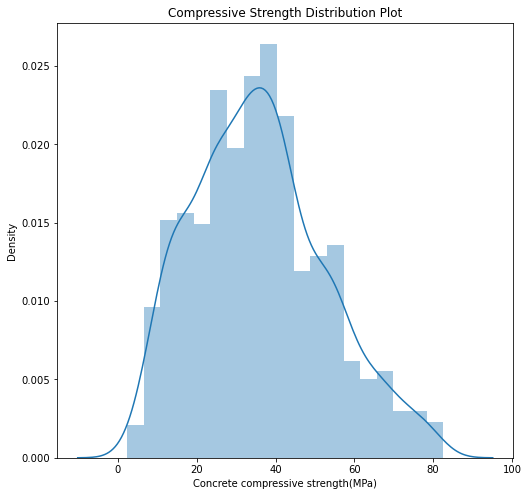

In [13]:
import warnings
warnings.filterwarnings('ignore')

#price column = target column

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.title('Compressive Strength Distribution Plot')
sns.distplot(df['Concrete compressive strength(MPa)'])

plt.show()

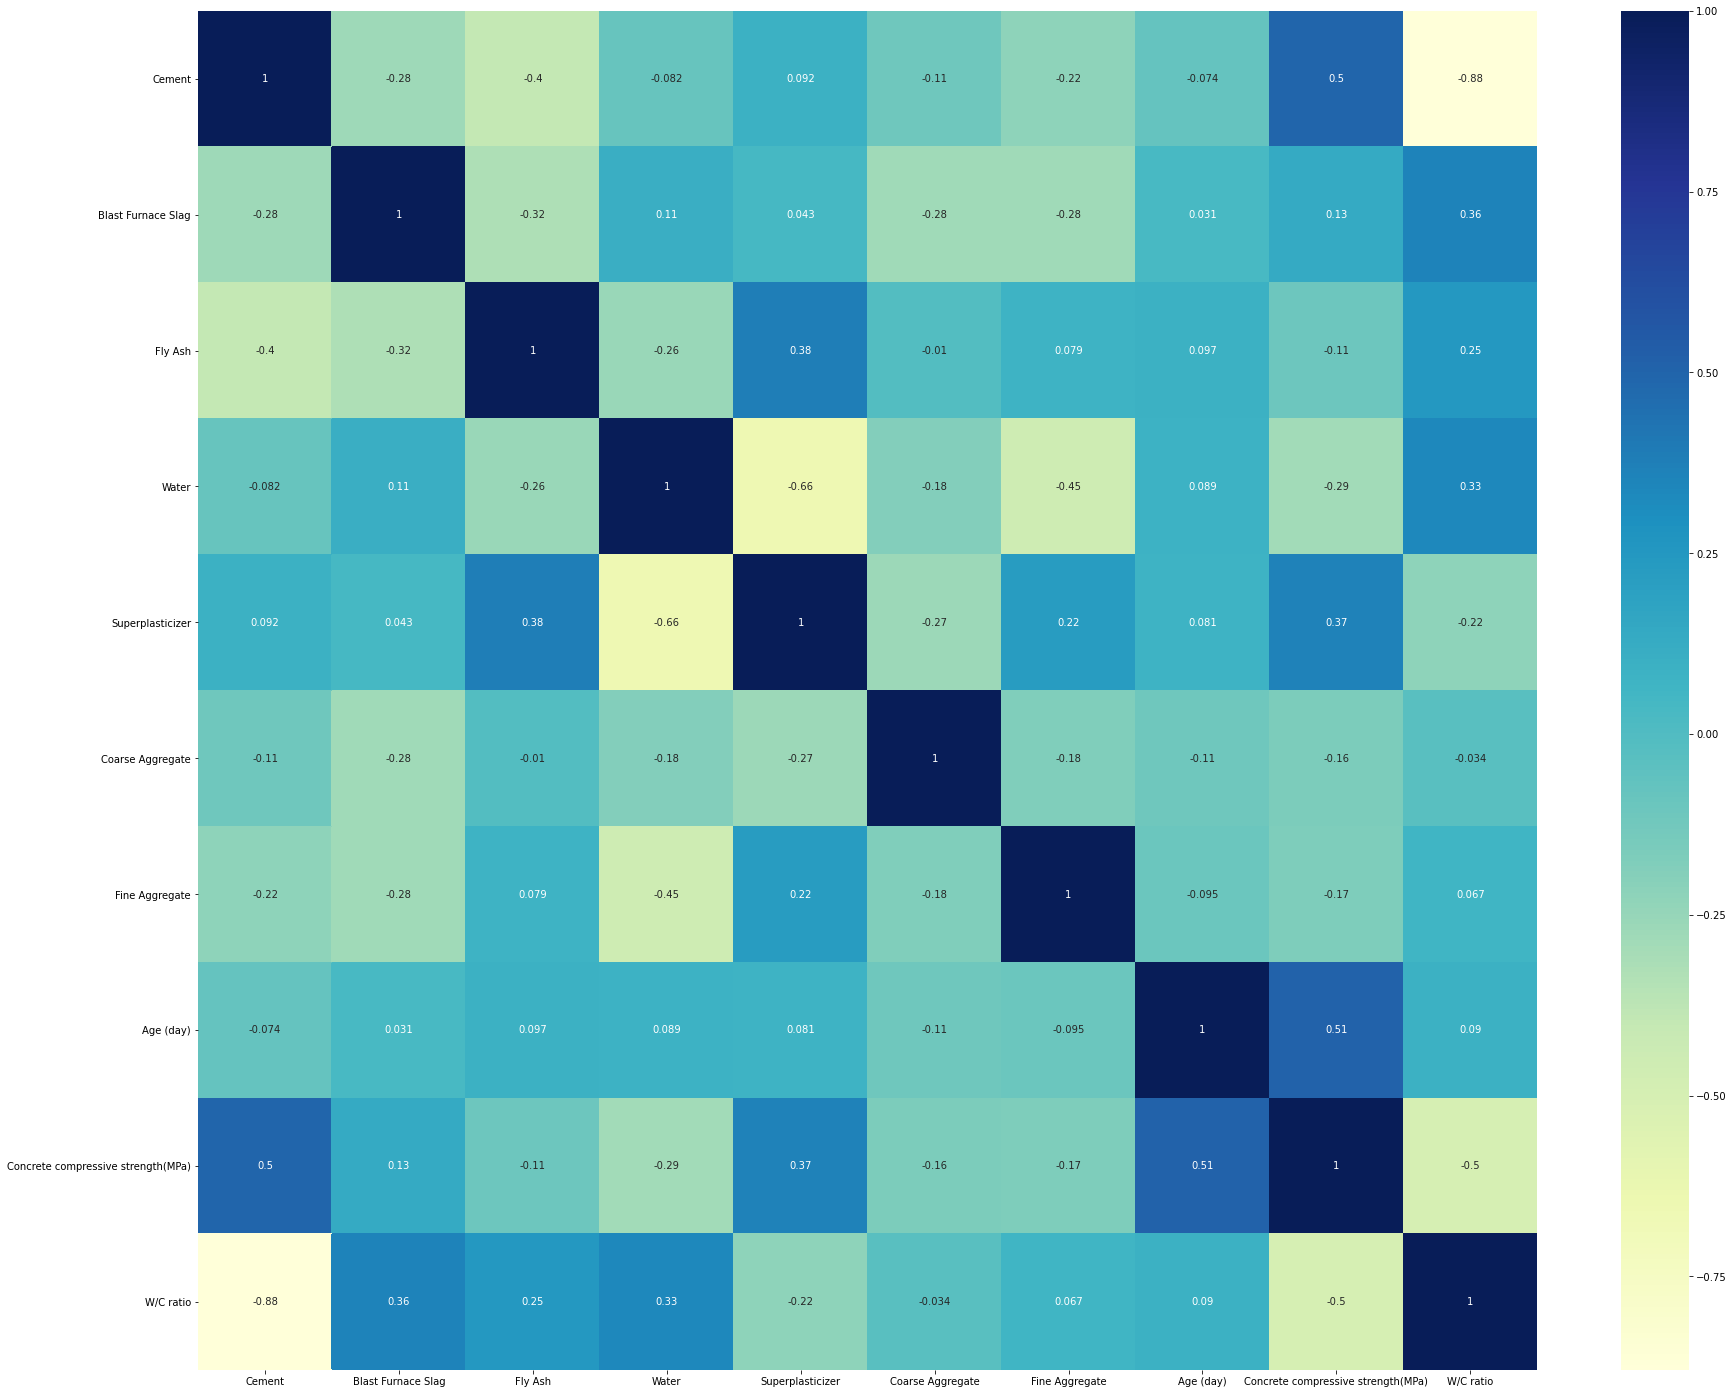

In [14]:
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

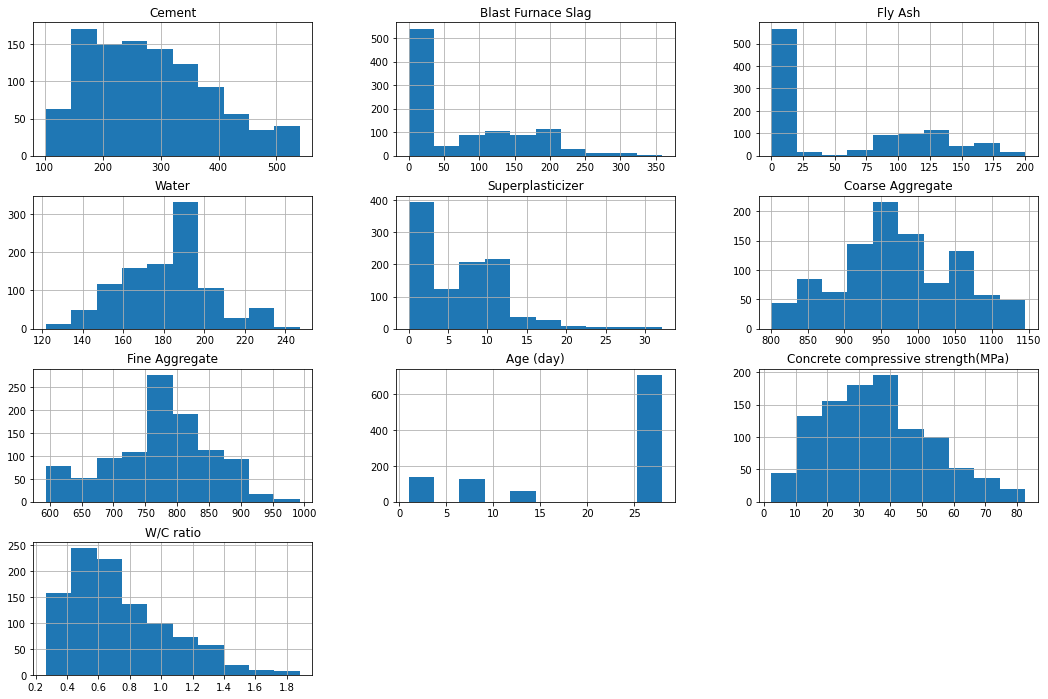

In [15]:
%matplotlib inline

df.hist(figsize = (18, 12))

plt.show()

# Data for our model

In [16]:
con_data = df[['Concrete compressive strength(MPa)', 'W/C ratio', 'Water', 'Cement', 'Blast Furnace Slag', 'Fly Ash', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)']]

In [17]:
con_data

,Concrete compressive strength(MPa),W/C ratio,Water,Cement,Blast Furnace Slag,Fly Ash,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
0,79.99,0.300000,162.0,540.0,0.0,0.0,2.5,1040.0,676.0,28
1,61.89,0.300000,162.0,540.0,0.0,0.0,2.5,1055.0,676.0,28
2,40.27,0.685714,228.0,332.5,142.5,0.0,0.0,932.0,594.0,28
3,41.05,0.685714,228.0,332.5,142.5,0.0,0.0,932.0,594.0,28
4,44.30,0.966767,192.0,198.6,132.4,0.0,0.0,978.4,825.5,28
...,...,...,...,...,...,...,...,...,...,...
1025,44.28,0.649783,179.6,276.4,116.0,90.3,8.9,870.1,768.3,28
1026,31.18,0.608318,196.0,322.2,0.0,115.6,10.4,817.9,813.4,28
1027,23.70,1.297643,192.7,148.5,139.4,108.6,6.1,892.4,780.0,28
1028,32.77,1.103708,175.6,159.1,186.7,0.0,11.3,989.6,788.9,28


# Data splitting(test-train)

In [18]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(con_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
y_train = df_train.pop('Concrete compressive strength(MPa)')
X_train = df_train

In [20]:
y_test = df_test.pop('Concrete compressive strength(MPa)')
X_test = df_test

# Data normalisation

In [21]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

In [22]:
X_train.head()

,W/C ratio,Water,Cement,Blast Furnace Slag,Fly Ash,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
282,0.022972,0.290267,-0.314201,-0.830192,1.033435,0.050088,0.714998,-0.166334,0.646411
599,-0.518596,0.694259,0.515141,-0.830192,-0.828112,-1.000953,-0.064901,0.122372,-1.438212
252,0.022326,0.237985,-0.327456,-0.830192,0.677806,-0.097715,-0.208227,1.116116,0.646411
193,0.333275,0.737035,-0.480827,-0.830192,0.660496,-0.245518,-0.336059,1.004598,0.646411
644,-0.678140,0.171445,0.619282,-0.830192,-0.828112,-1.000953,0.993903,-0.013927,0.646411


converting dataframe to array

In [23]:
X_train = X_train.values
y_train = y_train.values

y_test = y_test.values
X_test = X_test.values

In [24]:
X_train.shape

(721, 9)

# Results after following the workflow suggested

After following the workflow suggested:

    model-1 => input Layer (No. of features = 9 ), 
               3 hidden layers including 10,8,6 unit & 
               Output Layer with activation function relu.
    results => loss: 71.9459 - mae: 6.8397(on test data)
    
    model-2 => input Layer (No. of features = 9 ), 
               1 hidden layers(7 units), regulizer(l2(0.001)) & 
               Output Layer with activation function relu.
    results => loss: 80.3320 - mae: 7.0268(on test data)
    
The best result I got from a model was after using k-fold cross validation which was the right choice for our deep learning
model as we had very few data available. 

# using k_fold validation

In [25]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)))

    model.add(layers.Dense(7, activation='relu'))

    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [26]:
k = 4
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([X_train[:i * num_val_samples], X_train[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# Results

In [27]:
all_scores

[5.42009162902832, 5.066506385803223, 5.055142402648926, 5.649839401245117]

In [28]:
np.mean(all_scores)

5.2978949546813965

# Checking performance of model on each epoch

In [29]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([X_train[:i * num_val_samples],
                                         X_train[(i + 1) * num_val_samples:]],axis=0)

    partial_train_targets = np.concatenate([y_train[:i * num_val_samples], 
                                            y_train[(i + 1) * num_val_samples:]],axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [30]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

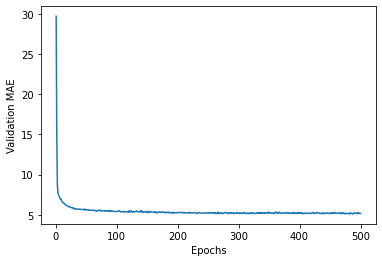

In [31]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

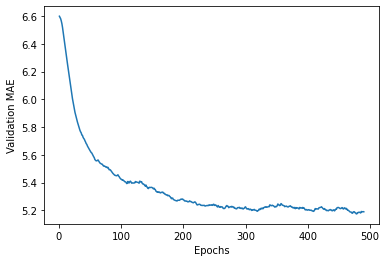

In [32]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# conclusion:

According to the above plot our Model's validation MAE stops improving after 350 epochs. Which means our model overfits after 320th epoch

# Evaluation

Getting a fresh model with 320 epochs

In [41]:
model_f = build_model()
model_f.fit(X_train, y_train, epochs=320, batch_size=32, verbose=0)

test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 56.0832 - mae: 5.3740


In [42]:
print('Test MAE score : ', test_mae_score)
print('Test loss : ', test_mse_score)

Test MAE score :  5.373987674713135
Test loss :  56.08320617675781


# Predictions

In [43]:
predictions = model_f.predict(X_test)

In [44]:
for i in range(10):
    print("Actual=%s, Predicted=%s" % (y_test[i], predictions[i]))

Actual=68.1, Predicted=[64.0012]
Actual=71.3, Predicted=[64.94736]
Actual=25.18, Predicted=[31.008701]
Actual=19.52, Predicted=[19.798439]
Actual=38.02, Predicted=[40.018154]
Actual=19.69, Predicted=[20.835848]
Actual=26.91, Predicted=[44.825268]
Actual=15.52, Predicted=[17.512094]
Actual=21.07, Predicted=[35.996895]
Actual=18.03, Predicted=[17.5457]
